In [186]:
#imports

import seaborn as sns
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# EDA

- I inserted mannualy some outlyers and null value observations

In [187]:
df = pd.read_csv('./drug200.csv', sep=',')

print(df.dtypes)


Age            float64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object


In [188]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,F,HIGH,HIGH,25.355,drugY
1,47.0,M,LOW,HIGH,13.093,drugC
2,47.0,M,LOW,HIGH,10.114,drugC
3,28.0,F,NORMAL,HIGH,7.798,drugX
4,61.0,F,LOW,HIGH,18.043,drugY


In [189]:
df.shape

(207, 6)

In [190]:
df.isna().sum()

Age            1
Sex            2
BP             1
Cholesterol    1
Na_to_K        1
Drug           1
dtype: int64

In [191]:
df = df.dropna()
df = df.drop_duplicates()

In [192]:
df.describe()


,Age,Na_to_K
count,201.000000,201.000000
mean,44.169154,16.253219
std,16.631934,7.592582
min,15.000000,6.269000
25%,31.000000,10.446000
50%,45.000000,13.938000
75%,58.000000,19.416000
max,74.000000,50.000000


In [193]:
df.shape

(201, 6)

### Outlayer detection

- i inserted a outlayer manually
- just demonstrating on how to do it

since the dataset was cleaned already, we would loose out on relevant information when 

In [194]:
def detect_outliers(dataframe: pd.DataFrame):
    outlier_indexes = []
    for col in dataframe.select_dtypes(include='number').columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        outliers_col_indexes = dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)].index
        outlier_indexes.extend(outliers_col_indexes)

    return outlier_indexes



def remove_outliers(dataframe: pd.DataFrame, outliers: int):
    return dataframe[~dataframe.index.isin(outliers)]



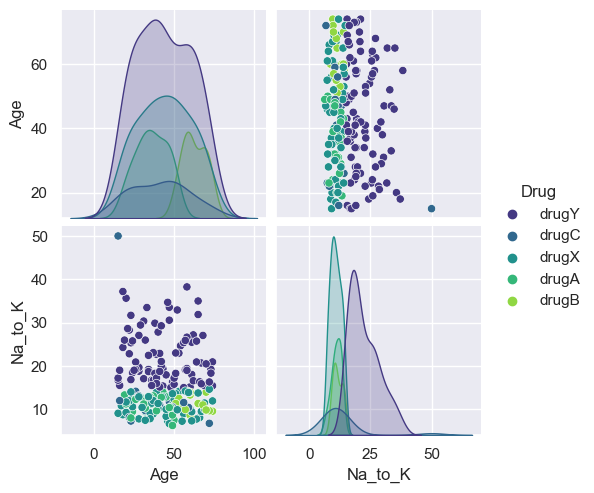

In [195]:

colors = sns.color_palette("viridis", n_colors=5)
sns.pairplot(df ,hue='Drug',palette=colors)

In [196]:
outlier_indexes = detect_outliers(df)
print(f"DataFrame with Outliers: \n{df.loc[outlier_indexes]}\n\n{df.loc[outlier_indexes].shape}")

df_clean = remove_outliers(df, outlier_indexes)

print(f"\nDataFrame without Outliers: \n{df_clean.head()}\n\n{df_clean.shape}")


DataFrame with Outliers: 
      Age Sex    BP Cholesterol  Na_to_K   Drug
24   33.0   F   LOW        HIGH   33.486  drugY
96   58.0   F   LOW        HIGH   38.247  drugY
98   20.0   M  HIGH      NORMAL   35.639  drugY
128  47.0   M   LOW      NORMAL   33.542  drugY
131  52.0   M   LOW      NORMAL   32.922  drugY
184  18.0   F  HIGH        HIGH   37.188  drugY
189  65.0   M  HIGH      NORMAL   34.997  drugY
195  46.0   F  HIGH        HIGH   34.686  drugY
206  15.0   M   LOW        HIGH   50.000  drugC

(9, 6)

DataFrame without Outliers: 
    Age Sex      BP Cholesterol  Na_to_K   Drug
0  23.0   F    HIGH        HIGH   25.355  drugY
1  47.0   M     LOW        HIGH   13.093  drugC
2  47.0   M     LOW        HIGH   10.114  drugC
3  28.0   F  NORMAL        HIGH    7.798  drugX
4  61.0   F     LOW        HIGH   18.043  drugY

(192, 6)


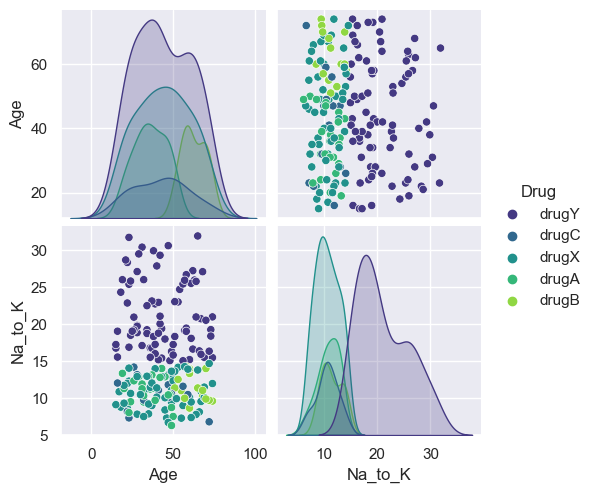

In [197]:


sns.pairplot(df_clean ,hue='Drug',palette=colors)

- since it is a classification task 

In [198]:
def plotCategoricalDistribution(_df: pd.DataFrame, feature: str):
    plt.figure(figsize=(7,4))
    ax = sns.countplot(_df, x=feature, palette=colors)
    ax.set_title(f'Distribution of {feature} Categories')
    print(f"{_df[feature].value_counts()} \n \n")
    plt.show()


Sex
M    100
F     92
Name: count, dtype: int64 
 



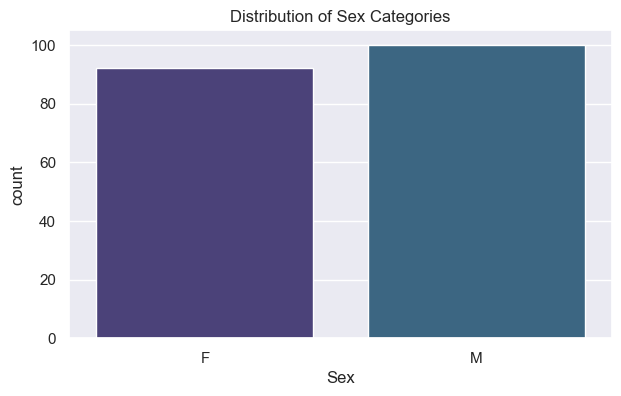

BP
HIGH      73
LOW       60
NORMAL    59
Name: count, dtype: int64 
 



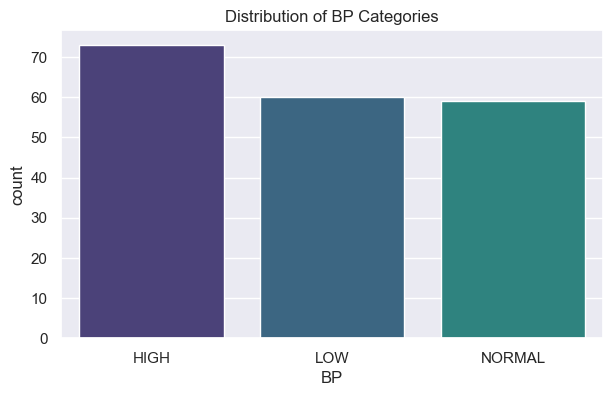

Cholesterol
HIGH      99
NORMAL    93
Name: count, dtype: int64 
 



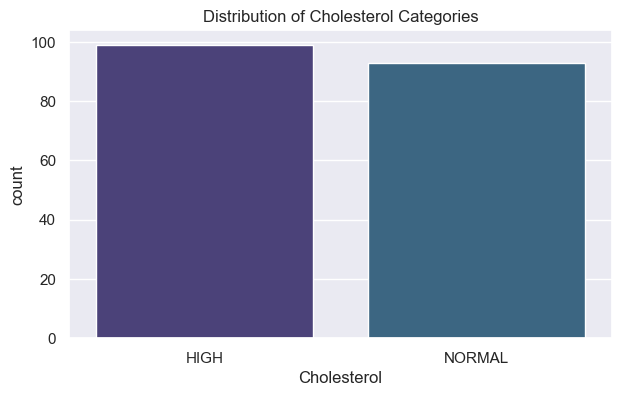

Drug
drugY    83
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64 
 



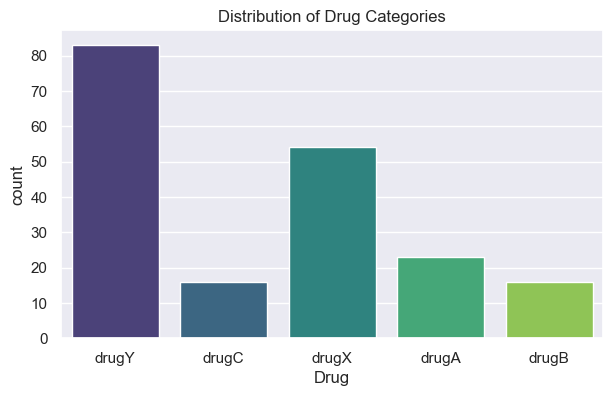

In [199]:
categoricalFeatureNames = list(df.select_dtypes(include=['object']).columns.values)

for feature in categoricalFeatureNames:
    plotCategoricalDistribution(_df=df_clean, feature=feature)

In [200]:
df_clean.head(1)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,F,HIGH,HIGH,25.355,drugY


In [201]:
print(f"Unique values in sex column: {df['Sex'].unique()}")
print(f"Unique values in bp column: {df['BP'].unique()}")
print(f"Unique values in cholesterol column: {df['Cholesterol'].unique()}")

print(f"\n\nUnique values in Target column: {df['Drug'].unique()}")

Unique values in sex column: ['F' 'M']
Unique values in bp column: ['HIGH' 'LOW' 'NORMAL']
Unique values in cholesterol column: ['HIGH' 'NORMAL']


Unique values in Target column: ['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


- encoding ordinal features

In [202]:
print(df_clean)

      Age Sex      BP Cholesterol  Na_to_K   Drug
0    23.0   F    HIGH        HIGH   25.355  drugY
1    47.0   M     LOW        HIGH   13.093  drugC
2    47.0   M     LOW        HIGH   10.114  drugC
3    28.0   F  NORMAL        HIGH    7.798  drugX
4    61.0   F     LOW        HIGH   18.043  drugY
..    ...  ..     ...         ...      ...    ...
196  56.0   F     LOW        HIGH   11.567  drugC
197  16.0   M     LOW        HIGH   12.006  drugC
198  52.0   M  NORMAL        HIGH    9.894  drugX
199  23.0   M  NORMAL      NORMAL   14.020  drugX
200  40.0   F     LOW      NORMAL   11.349  drugX

[192 rows x 6 columns]


In [203]:
ordinal_mapping_bp = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
ordinal_mapping_cholesterol = {'NORMAL': 0, 'HIGH': 1}

df_encoded = df_clean.copy()

df_encoded['BP'] = df_encoded['BP'].map(ordinal_mapping_bp)
df_encoded['Cholesterol'] = df_encoded['Cholesterol'].map(ordinal_mapping_cholesterol)
print(df_clean)
df_encoded

      Age Sex      BP Cholesterol  Na_to_K   Drug
0    23.0   F    HIGH        HIGH   25.355  drugY
1    47.0   M     LOW        HIGH   13.093  drugC
2    47.0   M     LOW        HIGH   10.114  drugC
3    28.0   F  NORMAL        HIGH    7.798  drugX
4    61.0   F     LOW        HIGH   18.043  drugY
..    ...  ..     ...         ...      ...    ...
196  56.0   F     LOW        HIGH   11.567  drugC
197  16.0   M     LOW        HIGH   12.006  drugC
198  52.0   M  NORMAL        HIGH    9.894  drugX
199  23.0   M  NORMAL      NORMAL   14.020  drugX
200  40.0   F     LOW      NORMAL   11.349  drugX

[192 rows x 6 columns]


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,F,2,1,25.355,drugY
1,47.0,M,0,1,13.093,drugC
2,47.0,M,0,1,10.114,drugC
3,28.0,F,1,1,7.798,drugX
4,61.0,F,0,1,18.043,drugY
...,...,...,...,...,...,...
196,56.0,F,0,1,11.567,drugC
197,16.0,M,0,1,12.006,drugC
198,52.0,M,1,1,9.894,drugX
199,23.0,M,1,0,14.020,drugX


- encoding nominal feature

In [204]:
df_encoded = pd.get_dummies(df_encoded, columns=['Sex'], prefix='Sex')
df_encoded = df_encoded.drop(columns=["Sex_M"])
df_encoded['Sex_F'] = df_encoded['Sex_F'].apply(lambda x: 1 if x else 0)
df_encoded.head()


,Age,BP,Cholesterol,Na_to_K,Drug,Sex_F
0,23.0,2,1,25.355,drugY,1
1,47.0,0,1,13.093,drugC,0
2,47.0,0,1,10.114,drugC,0
3,28.0,1,1,7.798,drugX,1
4,61.0,0,1,18.043,drugY,1


In [205]:
def map_drugs(drug):
    if drug == 'drugA':
        return 0
    elif drug == 'drugB':
        return 1
    elif drug == 'drugC':
        return 2
    elif drug == 'drugX':
        return 3
    else:
        return 4
df_encoded_corr = df_encoded.copy()
df_encoded['Drug'] = df_encoded['Drug'].apply(map_drugs)
df_encoded

,Age,BP,Cholesterol,Na_to_K,Drug,Sex_F
0,23.0,2,1,25.355,4,1
1,47.0,0,1,13.093,2,0
2,47.0,0,1,10.114,2,0
3,28.0,1,1,7.798,3,1
4,61.0,0,1,18.043,4,1
...,...,...,...,...,...,...
196,56.0,0,1,11.567,2,1
197,16.0,0,1,12.006,2,0
198,52.0,1,1,9.894,3,0
199,23.0,1,0,14.020,3,0


In [206]:
df_encoded_corr = pd.concat([df_encoded_corr, pd.get_dummies(df_clean['Drug']).astype(int)], axis=1)
df_encoded_corr.drop(columns='Drug', inplace=True)
df_encoded_corr

,Age,BP,Cholesterol,Na_to_K,Sex_F,drugA,drugB,drugC,drugX,drugY
0,23.0,2,1,25.355,1,0,0,0,0,1
1,47.0,0,1,13.093,0,0,0,1,0,0
2,47.0,0,1,10.114,0,0,0,1,0,0
3,28.0,1,1,7.798,1,0,0,0,1,0
4,61.0,0,1,18.043,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
196,56.0,0,1,11.567,1,0,0,1,0,0
197,16.0,0,1,12.006,0,0,0,1,0,0
198,52.0,1,1,9.894,0,0,0,0,1,0
199,23.0,1,0,14.020,0,0,0,0,1,0


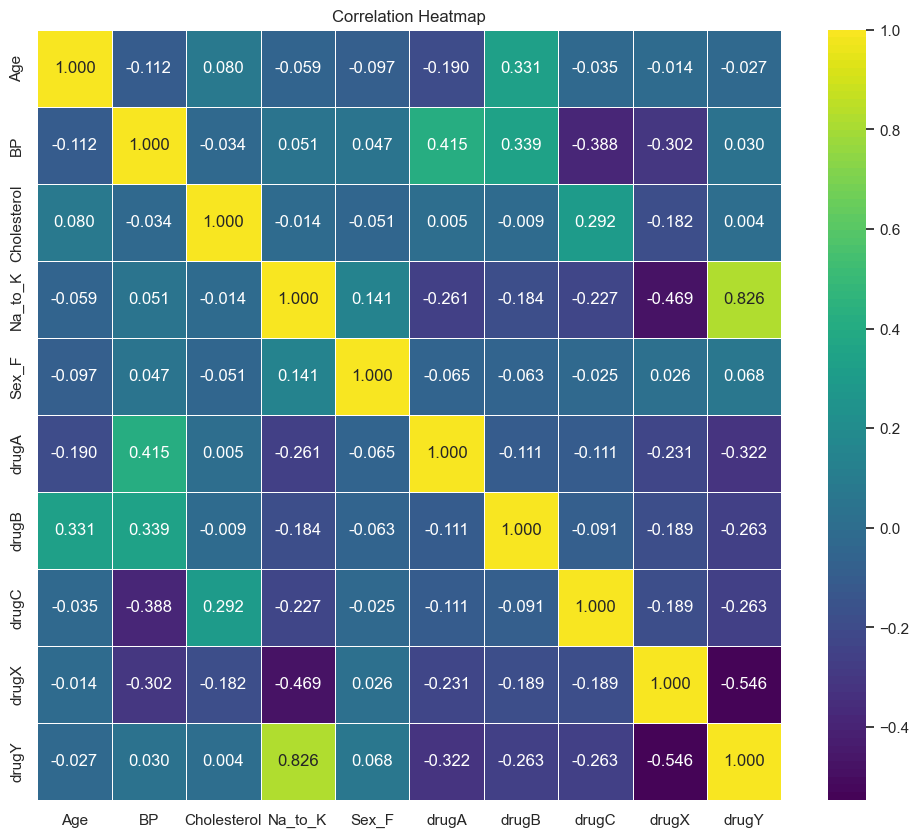

,Age,BP,Cholesterol,Na_to_K,Sex_F,drugA,drugB,drugC,drugX,drugY
Age,1.000000,-0.111823,0.080021,-0.059290,-0.096846,-0.190450,0.330509,-0.034610,-0.014291,-0.027280
BP,-0.111823,1.000000,-0.033960,0.051206,0.047393,0.414609,0.338861,-0.388082,-0.302422,0.030167
Cholesterol,0.080021,-0.033960,1.000000,-0.013611,-0.050850,0.004513,-0.009427,0.292232,-0.181815,0.004273
Na_to_K,-0.059290,0.051206,-0.013611,1.000000,0.140840,-0.260777,-0.183624,-0.227023,-0.469304,0.825966
Sex_F,-0.096846,0.047393,-0.050850,0.140840,1.000000,-0.064883,-0.062869,-0.025148,0.026087,0.067959


In [207]:
plt.figure(figsize=(12, 10))
colors = sns.color_palette("viridis", n_colors=100)
sns.heatmap(df_encoded_corr.corr(), fmt=".3f", linewidths=.5, annot=True, cmap=colors)
plt.title('Correlation Heatmap')
plt.show()
df_encoded_corr.corr().head()

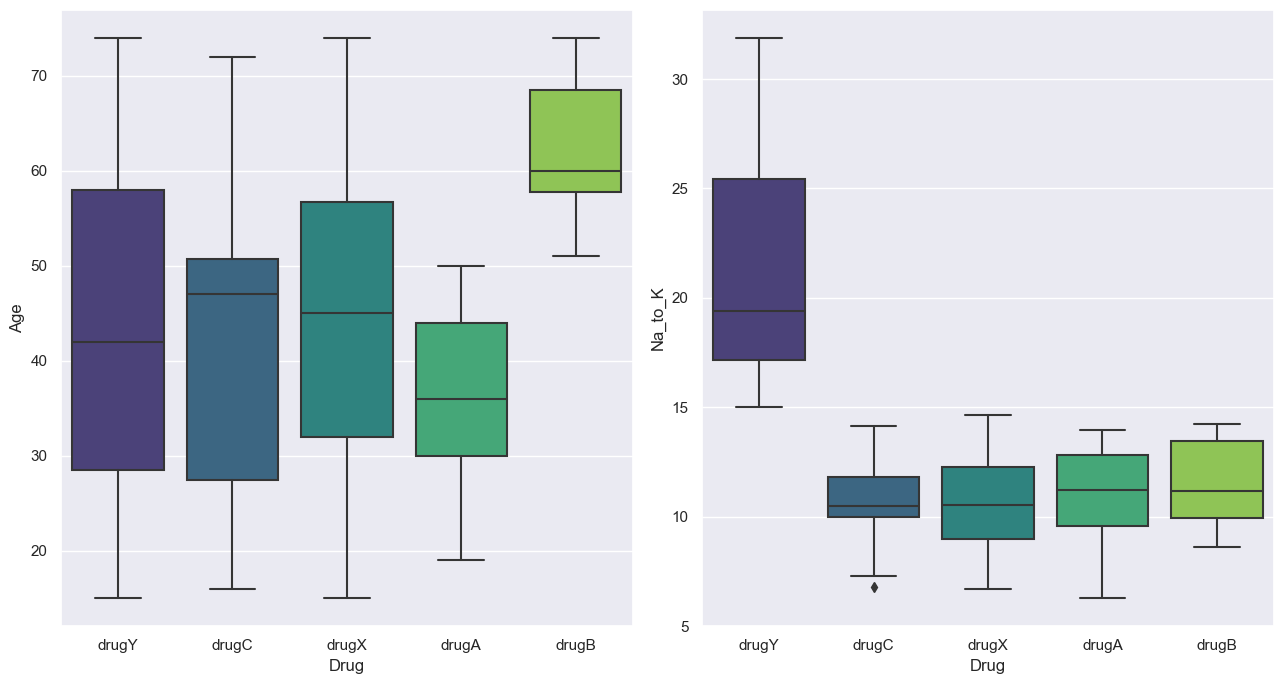

In [208]:
features = ['Age', 'Na_to_K']
fig, axes = plt.subplots(1, 2, figsize=(13, 7))
colors = sns.color_palette("viridis", n_colors=5)

for feature, ax in zip(features, axes):

    sns.boxplot(data=df_clean, x='Drug', y=feature, ax=ax, palette=colors)
plt.tight_layout()
plt.show()

## Create Test Split

In [209]:
x_clean = df_clean.iloc[:, df_clean.columns != 'Drug']
y_clean = df_clean[['Drug']]

x_encoded = df_encoded.iloc[:, df_encoded.columns != 'Drug']
y_encoded = df_encoded[['Drug']]


Xtrain_clean,Xtest_clean,Ytrain_clean,Ytest_clean = train_test_split(x_clean,y_encoded,test_size=0.25, random_state=404, stratify=y_clean)
Xtrain_encoded,Xtest_encoded,Ytrain_encoded,Ytest_encoded = train_test_split(x_encoded,y_encoded,test_size=0.25, random_state=404, stratify=y_encoded)
# stratify to enshure that the training data is balanced aswell

## Model Evaluation Method

In [210]:
from IPython import display

class Printer(str):
    def __repr__(self):
        return self

def print_report(model, x_train, x_test, y_train, y_test, labels=None):
    """
    prints metrics report for a model based on its predictions and true values

    :param model:    trained model
    :param x_train:  feature train values 
    :param x_test:   feature test values    
    :param y_train:  true train values 
    :param y_test:   true test values
    :param labels:   (optional) list of target labels in case of categorical target that had been mapped to numbers
    """

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    if labels is not None:
        train_pred = [labels[i] for i in train_pred]
        test_pred = [labels[i] for i in test_pred]
        y_train = [labels[i] for i in y_train]
        y_test = [labels[i] for i in y_test]

    metrics = {}

    # Classification report for both training and test data
    train_report = classification_report(y_train, train_pred, output_dict=True)
    test_report = classification_report(y_test, test_pred, output_dict=True)

    # Extracting macro-averaged F1-score for analysis
    metrics['train_f1_macro'] = train_report['macro avg']['f1-score']
    metrics['test_f1_macro'] = test_report['macro avg']['f1-score']

    # Check for fit based on macro-averaged F1-score
    if np.abs(metrics['train_f1_macro'] - metrics['test_f1_macro']) > 0.1:
        metrics['generalization'] = 'Model has no good generalization power on new unseen data!'
    else:
        metrics['generalization'] = 'Model fits the data well'

    display.display(
        Printer(f'{" Classification Report ":=^70}'),
        Printer(classification_report(y_test, test_pred))
    )
    display.display(
        Printer(f'{" Metrics ":=^70}'),
        Printer(f'{"Train F1 Macro: " + str(metrics["train_f1_macro"])}' + '\n' +
                f'{"Test F1 Macro: " + str(metrics["test_f1_macro"])}' + '\n' +
                f'{"":-^70}' + '\n' +
                f'{"Fit Status: " + str(metrics["generalization"])}')
    )


### Import Models and Pipeline

In [211]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgbm

In [212]:
print(Ytrain_clean.value_counts())
print(Ytrain_encoded.value_counts())


Drug
4       62
3       41
0       17
1       12
2       12
Name: count, dtype: int64
Drug
4       62
3       41
0       17
1       12
2       12
Name: count, dtype: int64


###Modelle:

In [213]:
dt_encoded = DecisionTreeClassifier(random_state=42)
rf_encoded = RandomForestClassifier(random_state=42)

svc_encoded = SVC(random_state=42)

xgb_clean = xgb.XGBClassifier(random_state=42, enable_categorical=True)
xgb_encoded = xgb.XGBClassifier(random_state=42)

light_clean = lgbm.LGBMClassifier(random_state=42)
light_encoded = lgbm.LGBMClassifier(random_state=42)


In [214]:
target_samples = 33

undersampling_strategy = {0: 12, 1: 9, 2: 9, 3: 31, 4: 31}
oversampling_strategy = {0: target_samples, 1: target_samples, 2: target_samples, 3: target_samples, 4: target_samples}



In [215]:

to_be_tuned = {
    'undersampler__sampling_strategy': [undersampling_strategy],
    'oversampler__sampling_strategy': [oversampling_strategy],
    'estimator__criterion': ['gini', 'entropy', 'log_loss'],
    'estimator__max_depth': [ 2, 3, 4, 5, 6],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
}



pipe = ImbPipeline([
        ('undersampler', RandomUnderSampler(random_state=42)),
        ('scaler',       StandardScaler()),
        ('oversampler',  SMOTE(random_state=42)),
        ('estimator',    dt_encoded)
])


tuner = GridSearchCV(
        pipe,
        param_grid = to_be_tuned,
        scoring    = 'f1_weighted',
        n_jobs     = -1,
        cv         = StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        verbose    = 1
)
 
tuner.fit(
        Xtrain_encoded,
        Ytrain_encoded
)
print("\n\n", tuner.best_params_)
print_report(tuner, Xtrain_encoded, Xtest_encoded, Ytrain_encoded, Ytest_encoded)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


 {'estimator__criterion': 'gini', 'estimator__max_depth': 4, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'oversampler__sampling_strategy': {0: 33, 1: 33, 2: 33, 3: 33, 4: 33}, 'undersampler__sampling_strategy': {0: 12, 1: 9, 2: 9, 3: 31, 4: 31}}


======================= Classification Report ========================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        21

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

============================== Metrics ===============================

Train F1 Macro: 0.9855900621118012
Test F1 Macro: 1.0
----------------------------------------------------------------------
Fit Status: Model fits the data well

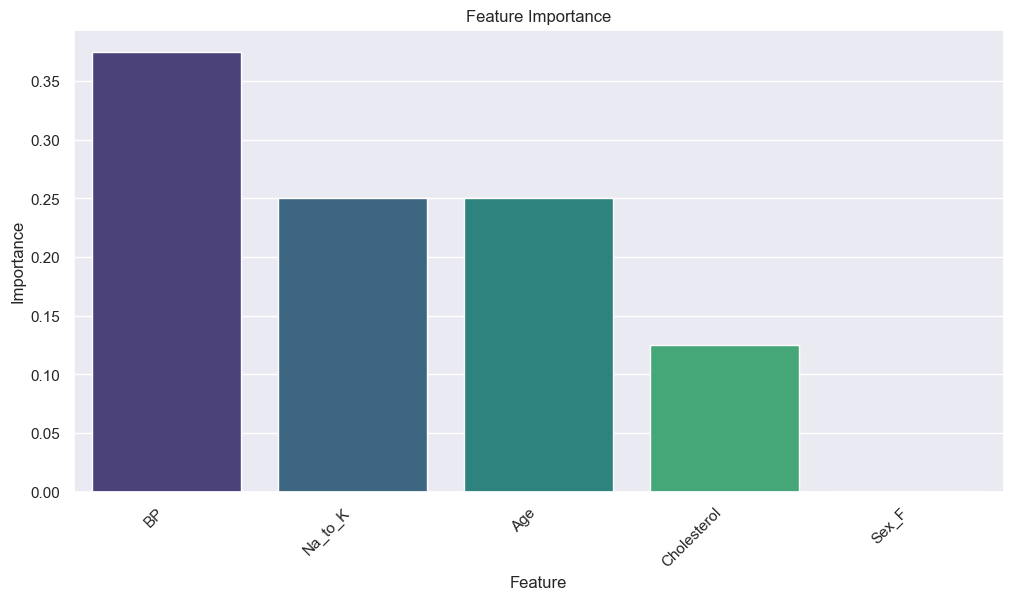

In [216]:
feature_importances = tuner.best_estimator_.named_steps['estimator'].feature_importances_
feature_names = Xtrain_encoded.columns
sorted_indices = np.argsort(feature_importances)[::-1]

colors = sns.color_palette("viridis", n_colors=len(feature_names))

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_names[sorted_indices], y=feature_importances[sorted_indices], palette=colors)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.show()

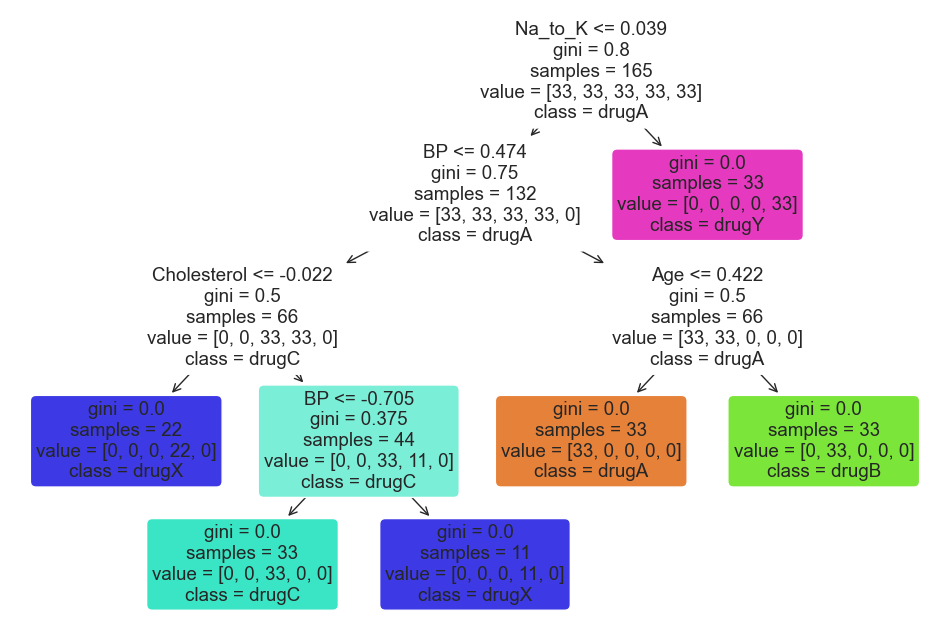

In [224]:

best_estimator = tuner.best_estimator_


plt.figure(figsize=(12, 8))
plot_tree(best_estimator.named_steps['estimator'], filled=True, feature_names=Xtrain_encoded.columns, class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], rounded=True, proportion=False)
plt.show()


In [218]:


to_be_tuned = {
    'undersampler__sampling_strategy': [undersampling_strategy],
    'oversampler__sampling_strategy': [oversampling_strategy],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__max_depth': [None, 5, 10, 15],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
}




pipe = ImbPipeline([
        ('undersampler', RandomUnderSampler(random_state=42)),
        ('scaler',       StandardScaler()),
        ('oversampler',  SMOTE(random_state=42)),
        ('estimator',    rf_encoded)
])


tuner1 = GridSearchCV(
        pipe,
        param_grid = to_be_tuned,
        scoring    = 'f1_weighted',
        n_jobs     = -1,
        cv         = StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        verbose    = 1
)
 
tuner1.fit(
        Xtrain_encoded,
        Ytrain_encoded
)
print("\n\n", tuner1.best_params_)
print_report(tuner1, Xtrain_encoded, Xtest_encoded, Ytrain_encoded, Ytest_encoded)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


 {'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'oversampler__sampling_strategy': {0: 33, 1: 33, 2: 33, 3: 33, 4: 33}, 'undersampler__sampling_strategy': {0: 12, 1: 9, 2: 9, 3: 31, 4: 31}}


======================= Classification Report ========================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        21

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

============================== Metrics ===============================

Train F1 Macro: 0.9855900621118012
Test F1 Macro: 1.0
----------------------------------------------------------------------
Fit Status: Model fits the data well

In [219]:

to_be_tuned = {
    'undersampler__sampling_strategy': [undersampling_strategy],
    'oversampler__sampling_strategy': [oversampling_strategy],
    'estimator__C': [0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__gamma': ['scale', 'auto', 0.1, 0.01],
    'estimator__shrinking': [True, False],
    'estimator__probability': [True],
    'estimator__tol': [0.001, 0.01, 0.1],
    'estimator__class_weight': [None, 'balanced']
}




pipe = ImbPipeline([
        ('undersampler', RandomUnderSampler(random_state=42)),
        ('scaler',       StandardScaler()),
        ('oversampler',  SMOTE(random_state=42)),
        ('estimator',    svc_encoded)
])


tuner2 = GridSearchCV(
        pipe,
        param_grid = to_be_tuned,
        scoring    = 'f1_weighted',
        n_jobs     = -1,
        cv         = StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        verbose    = 1
)
 
tuner2.fit(
        Xtrain_encoded,
        Ytrain_encoded
)
print("\n\n", tuner2.best_params_)
print_report(tuner2, Xtrain_encoded, Xtest_encoded, Ytrain_encoded, Ytest_encoded)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


 {'estimator__C': 1, 'estimator__class_weight': None, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear', 'estimator__probability': True, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'oversampler__sampling_strategy': {0: 33, 1: 33, 2: 33, 3: 33, 4: 33}, 'undersampler__sampling_strategy': {0: 12, 1: 9, 2: 9, 3: 31, 4: 31}}


======================= Classification Report ========================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       0.67      1.00      0.80         4
           3       1.00      0.92      0.96        13
           4       0.95      0.90      0.93        21

    accuracy                           0.94        48
   macro avg       0.92      0.97      0.94        48
weighted avg       0.95      0.94      0.94        48

============================== Metrics ===============================

Train F1 Macro: 0.9400650333273284
Test F1 Macro: 0.9373658536585365
----------------------------------------------------------------------
Fit Status: Model fits the data well

In [220]:


to_be_tuned = {
    'undersampler__sampling_strategy': [undersampling_strategy],
    'oversampler__sampling_strategy': [oversampling_strategy],
    'estimator__objective': ['multi:softmax'],
    'estimator__num_class': [5],  # Number of classes
    'estimator__learning_rate': [0.2],
    'estimator__max_depth': [2, 3, 5],
    'estimator__min_child_weight': [1, 3],
    'estimator__subsample': [0.8],
    'estimator__colsample_bytree': [0.7,0.8],
    'estimator__gamma': [0, 1],
}



pipe = ImbPipeline([
        ('undersampler', RandomUnderSampler(random_state=42)),
        ('scaler',       StandardScaler()),
        ('oversampler',  SMOTE(random_state=42)),
        ('estimator',    xgb_encoded)
])


tuner3 = GridSearchCV(
        pipe,
        param_grid = to_be_tuned,
        scoring    = 'f1_weighted',
        n_jobs     = -1,
        cv         = StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        verbose    = 1
)

tuner3.fit(
        Xtrain_encoded,
        Ytrain_encoded
)
print("\n\n", tuner3.best_params_)
print_report(tuner3, Xtrain_encoded, Xtest_encoded, Ytrain_encoded, Ytest_encoded)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


 {'estimator__colsample_bytree': 0.7, 'estimator__gamma': 1, 'estimator__learning_rate': 0.2, 'estimator__max_depth': 2, 'estimator__min_child_weight': 1, 'estimator__num_class': 5, 'estimator__objective': 'multi:softmax', 'estimator__subsample': 0.8, 'oversampler__sampling_strategy': {0: 33, 1: 33, 2: 33, 3: 33, 4: 33}, 'undersampler__sampling_strategy': {0: 12, 1: 9, 2: 9, 3: 31, 4: 31}}


======================= Classification Report ========================

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00        13
           4       1.00      0.95      0.98        21

    accuracy                           0.98        48
   macro avg       0.96      0.99      0.97        48
weighted avg       0.98      0.98      0.98        48

============================== Metrics ===============================

Train F1 Macro: 0.9689145481903857
Test F1 Macro: 0.9728997289972898
----------------------------------------------------------------------
Fit Status: Model fits the data well

In [221]:


to_be_tuned = {
    'undersampler__sampling_strategy': [undersampling_strategy],
    'oversampler__sampling_strategy': [oversampling_strategy],
    'estimator__objective': ['multiclass'],
    'estimator__num_class': [5],  # Number of classes
    'estimator__learning_rate': [0.1, 0.2],
    'estimator__max_depth': [2, 3],
    'estimator__min_child_weight': [1, 3],
    'estimator__max_delta_step': [ 1],  # Maximum step size in weight estimation for logistic regression
    'estimator__subsample': [0.8],  # Subsample ratio of the training instances
    'estimator__colsample_bytree': [0.7, 0.8],  # Subsample ratio of columns when constructing each tree
    'estimator__n_estimators': [100, 200],  # Number of boosting rounds
}




pipe = ImbPipeline([
        ('undersampler', RandomUnderSampler(random_state=42)),
        ('scaler',       StandardScaler()),
        ('oversampler',  SMOTE(random_state=42)),
        ('estimator',    light_encoded)
])


tuner4 = GridSearchCV(
        pipe,
        param_grid = to_be_tuned,
        scoring    = 'f1_weighted',
        n_jobs     = -1,
        cv         = StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        verbose    = 1
)

tuner4.fit(
        Xtrain_encoded,
        Ytrain_encoded
)
print("\n\n", tuner4.best_params_)
print_report(tuner4, Xtrain_encoded, Xtest_encoded, Ytrain_encoded, Ytest_encoded)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 165, number of used features: 5
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

======================= Classification Report ========================

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         4
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        21

    accuracy                           0.98        48
   macro avg       0.96      0.97      0.96        48
weighted avg       0.98      0.98      0.98        48

============================== Metrics ===============================

Train F1 Macro: 0.9888947092718701
Test F1 Macro: 0.9595959595959596
----------------------------------------------------------------------
Fit Status: Model fits the data well

# Model evaluation and comparison

In [222]:
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

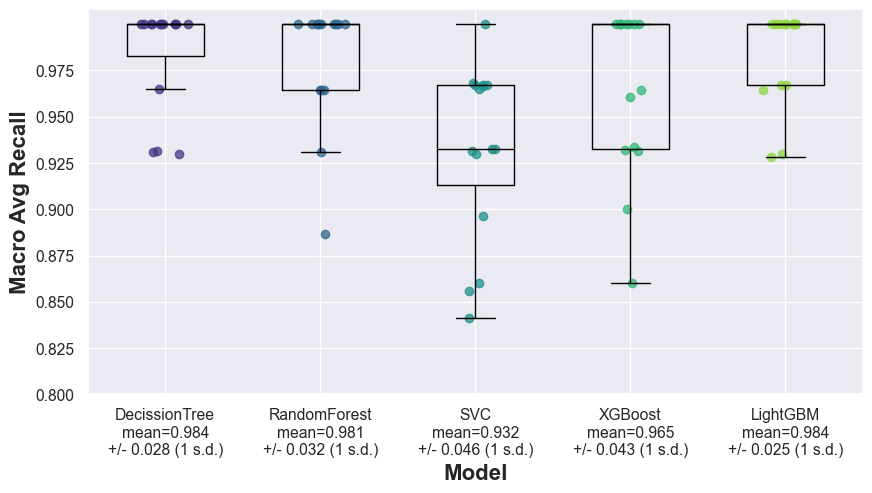

In [223]:
### Plotting all variance predictions as kde plots
models_dict = {
        'DecissionTree':        tuner.best_estimator_,
        'RandomForest':       tuner1.best_estimator_,
        'SVC':          tuner2.best_estimator_,
        'XGBoost':      tuner3.best_estimator_,
        'LightGBM':     tuner4.best_estimator_,
}
 
model_preds_dict = {}
model_score_stats = []
 
for name, model in models_dict.items():
    cv_metric_scores = cross_val_score(
                                    estimator = model,
                                    X         = Xtrain_encoded,
                                    y         = Ytrain_encoded,
                                    n_jobs    = -1,
                                    cv        = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42),
                                    scoring   = 'f1_weighted'
    )
    model_preds_dict[name] = cv_metric_scores
    model_score_stats.append([name, cv_metric_scores.mean(), cv_metric_scores.std()])
 
 
model_preds_df = pd.DataFrame(model_preds_dict)
vals, names, xs = [],[],[]
for i, col in enumerate(model_preds_df.columns):
    vals.append(model_preds_df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.075, model_preds_df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted (i + 1, 0.04)
 
# figsize
plt.figure(figsize=(10, 5))
plt.boxplot(vals, labels=names, medianprops={'color':'black'}, showfliers=False)
palette2 = sns.color_palette("viridis", n_colors=5)
for x, val, c in zip(xs, vals, palette2):
    plt.scatter(x, val, alpha=0.75, color=c)
 
#plt.title('Model Perfromance Across Varying Data Splits\n(MWU α < 0.05)', weight='bold')
plt.ylabel('Macro Avg Recall', weight='bold', fontsize=16)
plt.xlabel('Model', weight='bold', fontsize=16)
# Manually set y-axis ticks from 0.35 to 1, in steps of 0.05
plt.yticks(np.arange(0.80, 1, 0.025), fontsize=11.25)
# include mean and std in xticklabels and make only name bold:
xticklabels = [f'{name}\nmean={mean:0.3f}\n+/- {std:0.3f} (1 s.d.)' for name, mean, std in model_score_stats]
plt.xticks(ticks=np.arange(1, len(names)+1), labels=xticklabels, fontsize= 11.25, rotation=0)
plt.show()